In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [153]:
transactions = pd.read_csv("Online Retail.csv")
transactions

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


From Kaggle

About Dataset

The "Online Retail Transaction" dataset contains information on transactions made by customers through an online retail platform. The dataset includes data on the products that were purchased, the quantity of each product, the date and time of each transaction, the price of each product, the unique identifier for each customer who made a purchase, and the country where each customer is located. This dataset can be used to analyze customer behavior and preferences, identify popular products, and optimize pricing and marketing strategies. The dataset is well-suited for data analysis and machine learning applications, as it contains a large volume of transactional data that can be used to train predictive models and make data-driven decisions.
Column Descriptors

    StockCode: A code used to identify the product that was purchased
    Description: A brief description of the product that was purchased
    Quantity: The quantity of the product that was purchased
    InvoiceDate: The date and time that the purchase was made
    UnitPrice: The price of one unit of the product that was purchased
    CustomerID: The unique identifier for the customer who made the purchase
    Country: The country where the customer who made the purchase is located


In [154]:
transactions.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [155]:
transactions[transactions["Description"].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,15287,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,15287,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,15287,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,15287,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,15287,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,15287,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,15287,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,15287,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,15287,United Kingdom


In [156]:
transactions.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

In [157]:
transactions[transactions["StockCode"].str.contains("22139")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311,United Kingdom
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,15287,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,15287,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,15287,United Kingdom
7203,537011,22139,NaN,-5,2010-12-03 15:38:00,0.00,15287,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,15287,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,15287,United Kingdom


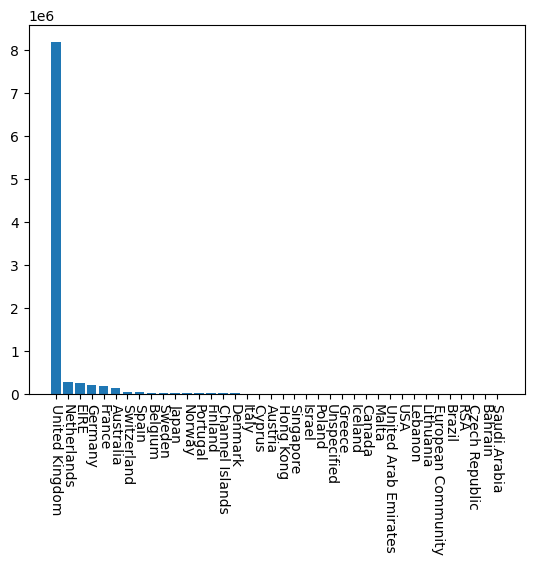

In [158]:
# sales per country
transactions["GrossRevenue"] = transactions["Quantity"] * transactions["UnitPrice"]
country_sales = transactions.groupby("Country")["GrossRevenue"].sum(numeric_only=True).sort_values(ascending=False)

plt.bar(country_sales.index,country_sales.values)
plt.xticks(rotation = -90)
plt.show()

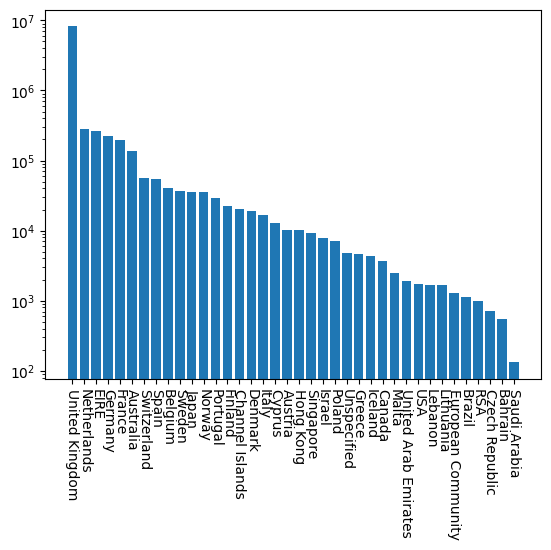

In [159]:
plt.bar(country_sales.index,country_sales.values,log=True)
plt.xticks(rotation = -90)
plt.show()

In [160]:
# customer base for each country
transactions.groupby("Country")["CustomerID"].count()
customers_per_country = transactions.groupby("Country")["CustomerID"].count()

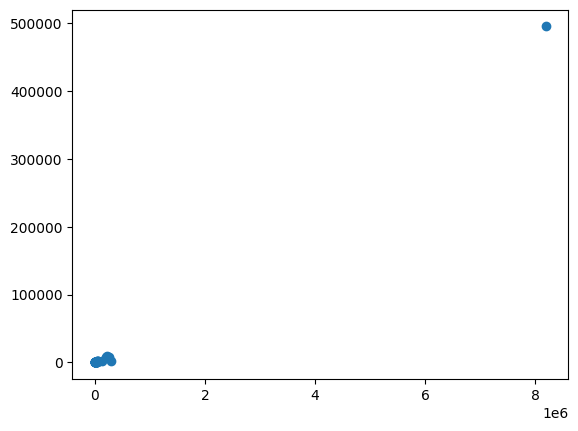

In [161]:
country_sales_alphabetical = country_sales.sort_index()
plt.scatter(country_sales_alphabetical.values,customers_per_country.values)
plt.show()

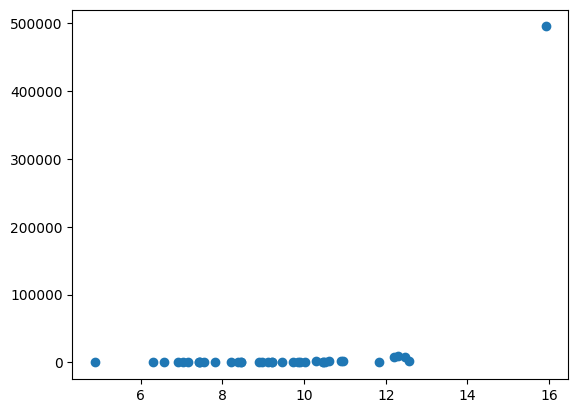

In [162]:
country_sales_log = country_sales.apply(lambda x: math.log(x))
plt.scatter(country_sales_log.sort_index().values,customers_per_country.values)
plt.show()

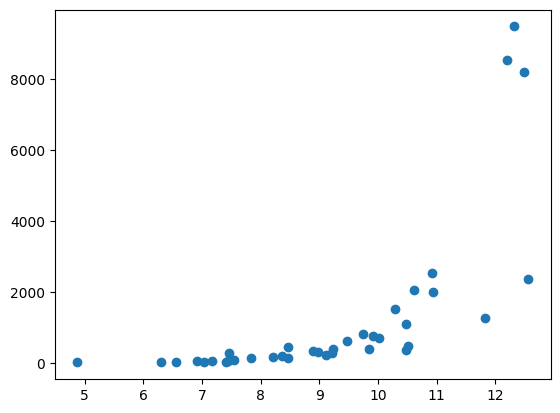

In [163]:
country_sales_log_without_uk = country_sales_log[country_sales_log.index != "United Kingdom"]
customers_per_country_without_uk = customers_per_country[customers_per_country.index != "United Kingdom"]

plt.scatter(country_sales_log_without_uk.sort_index().values,customers_per_country_without_uk.values)
plt.show()

In [164]:
# As expected, more customers = more sales. 
# what sort of questions can we ask using invoice date?
print(transactions["InvoiceDate"].max())
print(transactions["InvoiceDate"].min())

2011-12-09 12:50:00
2010-12-01 08:26:00


In [165]:
# create new columns that can help parse through datetime a bit better
transactions["InvoiceDate"] = pd.to_datetime(transactions["InvoiceDate"])
transactions

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GrossRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [175]:
transactions["month"] = pd.DatetimeIndex(transactions["InvoiceDate"]).month
transactions["hour"] = pd.DatetimeIndex(transactions["InvoiceDate"]).hour
transactions

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GrossRevenue,month,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,8
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,12,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,12,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,12


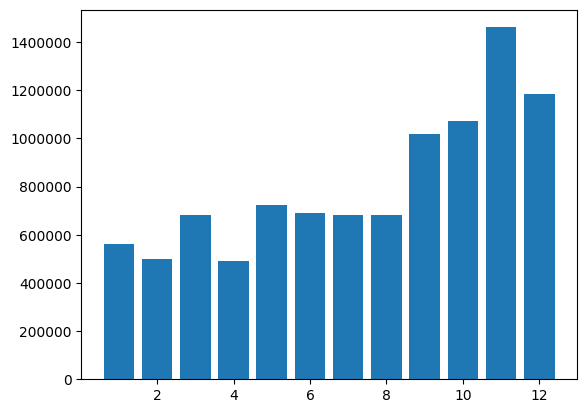

In [182]:
# spending per month
spending_per_month = transactions.groupby("month")["GrossRevenue"].sum()
plt.bar(spending_per_month.index,spending_per_month.values)
plt.ticklabel_format(style="plain")
plt.show()

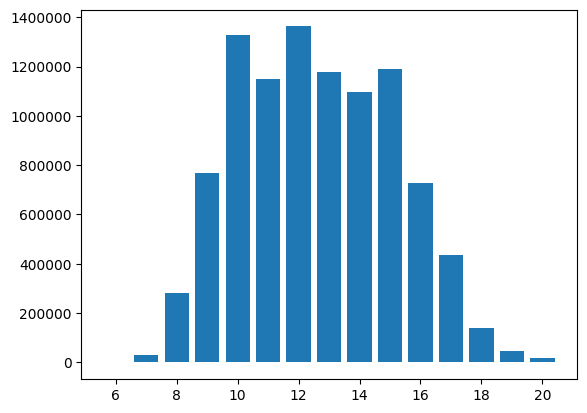

In [184]:
# spending during the day
spending_per_hour = transactions.groupby("hour")["GrossRevenue"].sum()
plt.bar(spending_per_hour.index,spending_per_hour.values)
plt.ticklabel_format(style="plain")
plt.show()

In [195]:
# popular items
quantities_sold_per_item = transactions.groupby("Description")["Quantity"].sum(numeric_only=True).sort_values(ascending=False)

In [201]:
# So description shows product descriptions and then some return information
quantities_sold_per_item[quantities_sold_per_item < 0].index[0:40]

Index(['TEA TIME CAKE STAND IN GIFT BOX', 'SWEETHEART KEY CABINET',
       '3 WICK CHRISTMAS BRIAR CANDLE ', 'CREAM SWEETHEART SHELF + HOOKS',
       'WOOLLY HAT SOCK GLOVE ADVENT STRING', 'DAMAGED',
       'BLUE FLYING SINGING CANARY', 'CREAM SWEETHEART TRAYS',
       'PORCELAIN HANGING BELL SMALL', 'FLAMINGO LIGHTS',
       'PINK LARGE JEWELED PHOTOFRAME', 'ROBIN CHRISTMAS CARD',
       'CREAM SWEETHEART MAGAZINE RACK', 'PINK SMALL GLASS CAKE STAND',
       'ANTIQUE LILY FAIRY LIGHTS', 'Show Samples', 'PINK CHERRY LIGHTS',
       'showroom', 're-adjustment', 'BLUE PADDED SOFT MOBILE',
       'VINTAGE GOLD TINSEL REEL', 'WOODEN BOX ADVENT CALENDAR ',
       'PINK POODLE HANGING DECORATION ', 'WHITE CHERRY LIGHTS', 'Crushed',
       'found some more on shelf', 'damages/showroom etc', 'faulty',
       'Bank Charges', 'water damaged', 'Water damaged', 'CRUK Commission',
       'crushed', 'samples', 'samples/damages', 'taig adjust no stock',
       'ASSORTED TUTTI FRUTTI ROUND BOX', 'sold

In [202]:
quantities_sold_per_item[quantities_sold_per_item < 0].index[41:100]

Index(['AMAZON FEE', 'stock creditted wrongly', 'crushed ctn', 'ebay',
       'cracked', 'mouldy', 'wet', 'Damages', 'stock check', 'water damage',
       'Damages/samples', 'adjust', 'sold with wrong barcode', 'SAMPLES',
       'label mix up', 'Dotcom sold in 6's', 'wet/rusty', 'broken',
       'incorrectly made-thrown away.', 'Missing', 'dotcom sales',
       'lost in space', 're dotcom quick fix.', 'wrong code?',
       'incorrectly put back into stock', 'wrong code', 'mix up with c',
       '????missing', 'can't find', 'missing?', 'CHECK', 'Display', 'wet?',
       'MIA', '?display?', '?? missing', 'wrong barcode (22467)', 'WET/MOULDY',
       'damages/display', 'wrongly coded 20713', '20713 wrongly marked',
       'reverse 21/5/10 adjustment', 'Dotcom sales', 'Amazon sold sets',
       'barcode problem', '?lost', 'wrongly marked carton 22804',
       'Wrongly mrked had 85123a in box', 'wet boxes', 'Dotcom',
       'Wet pallet-thrown away', 'wrong barcode', 'Sold as 1 on dotcom',
 

In [203]:
quantities_sold_per_item[quantities_sold_per_item < 0].index[101:]

Index(['rusty thrown away', '20713', 'mixed up',
       'historic computer difference?....se', 'temp adjustment',
       'rusty throw away', 'wet damaged', 'thrown away-can't sell.', '???lost',
       'damages?', 'MERCHANT CHANDLER CREDIT ERROR, STO', 'damages/dotcom?',
       'wrongly sold as sets', '?sold as sets?', '???missing', 'Dotcom set',
       'sold as 1', 'sold in set?', 'counted', 'POSSIBLE DAMAGES OR LOST?',
       'sold as set/6 by dotcom', 'wrongly coded-23343', 'code mix up? 84930',
       'wrongly sold sets', 'lost', 'damaged stock', 'Thrown away.', 'lost??',
       'wet rusty', 'Discount', '? sold as sets?',
       'sold as set on dotcom and amazon', 'reverse previous adjustment',
       'missing', '?', 'Given away', 'Incorrect stock entry.',
       'mystery! Only ever imported 1800', 'damages/credits from ASOS.',
       'wet pallet', 'damaged', 'mouldy, unsaleable.', '??', '?missing',
       'Thrown away-rusty', 'sold as set on dotcom', 'thrown away-can't sell',
     

In [218]:
# most popular items
quantities_sold_per_item.sort_values(ascending=False).head(25)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS      53847
JUMBO BAG RED RETROSPOT                47363
ASSORTED COLOUR BIRD ORNAMENT          36381
POPCORN HOLDER                         36334
PACK OF 72 RETROSPOT CAKE CASES        36039
WHITE HANGING HEART T-LIGHT HOLDER     35317
RABBIT NIGHT LIGHT                     30680
MINI PAINT SET VINTAGE                 26437
PACK OF 12 LONDON TISSUES              26315
PACK OF 60 PINK PAISLEY CAKE CASES     24753
VICTORIAN GLASS HANGING T-LIGHT        23854
ASSORTED COLOURS SILK FAN              23082
BROCADE RING PURSE                     23053
RED  HARMONICA IN BOX                  21866
JUMBO BAG PINK POLKADOT                21009
SMALL POPCORN HOLDER                   20116
PAPER CHAIN KIT 50'S CHRISTMAS         18902
LUNCH BAG RED RETROSPOT                18779
60 TEATIME FAIRY CAKE CASES            18040
PARTY BUNTING                          18022
CHARLOTTE BAG SUKI DESIGN              18002
HEART OF WICKER SMALL                  1783

- more interesting questions are a bit difficult to ask given the state of the data. would need more identifiers to determine trends (ex. type of item bought -> clothing, toy, cosmetics)
- returns and damaged goods are a bit difficult to parse in this data set.